# Figures and Data Observer

This notebook plots (and gives the option to save) figures. It also displays the means and standard deviations of all trials, as well as calculate the p-values when comparing different model performances.

This is 6th to be run, 1 out of 1

In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


% matplotlib inline

In [7]:
# Load Data

acc_fc = np.load('./results/fcnn_acc_0.npy')            # Load FCNN data  
acc_fc_new = np.load('./results/fcnn_acc_0.npy')        # Load FCNN data
acc_lin = np.load('./results/lda_score_test.npy')       # Load LDA data

acc = np.load('./results/ktree_acc_orig_0.npy')         # Load k-tree with original input data
rand_acc = np.load('./results/ktree_acc_rand_0.npy')    # Load k-tree with randomized input data
perm_acc = np.load('./results/ktree_acc_perm_0.npy')    # Load k-tree with permuted input data

In [8]:
# Initialize variables

trees_set = [1,2,4,8,16,32]
ds_set = ['MNIST','FMNIST','KMNIST','EMNIST','SVHN','USPS','CIFAR10']
classes = np.load('./results/classes.npy', allow_pickle=True)


In [9]:
# Initialize functions

def mean_std(acc_array, ds, cutoff=0.535):
    '''
    Takes the mean and standard deviation of trials that are above the threshold cutoff value
    Inputs: accuracy array, dataset index, threshold cutoff
    Outputs: selected trial mean, selected trial standard deviation, number of selected trials
    '''
    idx_all = []
    mean_idx = np.zeros(6)
    std_idx = np.zeros(6)
    count_idx = np.zeros(6)
    
    for i in range(6):
        idxt = np.where(acc_array[ds,:,i] > cutoff)
        idx_all.append(idxt)

    for j in range(6):
        count_idx[j] = len(idx_all[j][0])
        mean_idx[j] = np.mean(acc_array[ds,idx_all[j],j]) 
        std_idx[j] = np.std(acc_array[ds,idx_all[j],j]) 
    
    return(mean_idx, std_idx, count_idx)
    
    

def comparison(acc_array_1, acc_array_2, ds, cutoff=0.535):
    '''
    T_test comparing selected trials that are above threshold cutoff
    Inputs: Accuracy array 1, accuracy array 2, dataset index, threshold cutoff
    '''
    # Record keeping
    compare = np.zeros(6)
    
    # Make selection index for first accuracy array
    idx_1 = []
    for i in range(6):
        idx = np.where(acc_array_1[ds,:,i] > cutoff)
        idx = idx[0]
        idx = idx.tolist()
        idx_1.append(idx)

    # Make selection index for second accuracy array
    idx_2 = []
    for i in range(6):
        idx = np.where(acc_array_2[ds,:,i] > cutoff)
        idx = idx[0]
        idx = idx.tolist()
        idx_2.append(idx)
    
    # Use selection indices to select data for t-test, record p-values
    for j in range(6):
        _, compare[j] = scipy.stats.ttest_ind(acc_array_1[ds,idx_1[j],j], acc_array_2[ds,idx_2[j],j])
        
    return(compare)

# Plot 1-tree compared to LDA and FCNN

1: 0.9220 +/- 0.0179
lda: 0.8753 +/- 0.0120
fcnn: 0.9546 +/- 0.0053


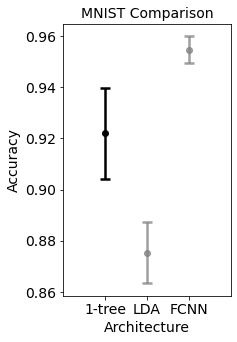

1: 0.7900 +/- 0.0202
lda: 0.6750 +/- 0.0108
fcnn: 0.8262 +/- 0.0063


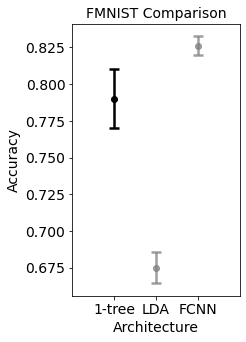

1: 0.8035 +/- 0.0488
lda: 0.6790 +/- 0.0164
fcnn: 0.8674 +/- 0.0188


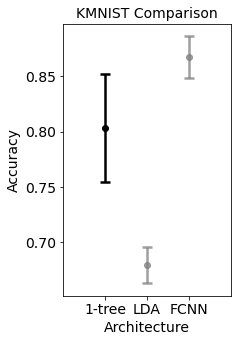

1: 0.8524 +/- 0.1520
lda: 0.5821 +/- 0.0180
fcnn: 0.9779 +/- 0.0046


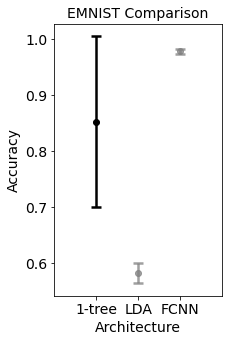

1: 0.5811 +/- 0.0412
lda: 0.5186 +/- 0.0102
fcnn: 0.6117 +/- 0.0844


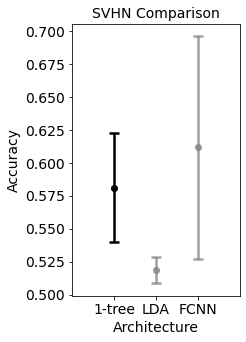

1: 0.8221 +/- 0.0465
lda: 0.8362 +/- 0.0306
fcnn: 0.8971 +/- 0.0199


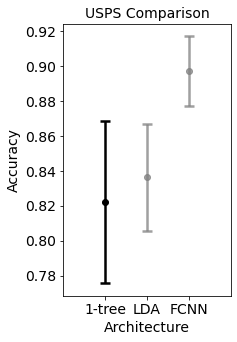

1: 0.5605 +/- 0.0140
lda: 0.5254 +/- 0.0069
fcnn: 0.5592 +/- 0.0148


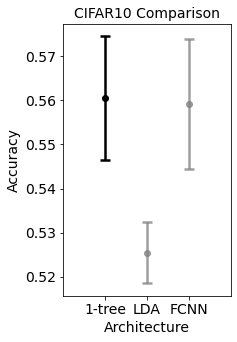

In [10]:
#######
## Plot 1-tree compared to LDA and FCNN
######

cutoff = 0.535

for ds, ds_name in enumerate(ds_set):


    fig, ax = plt.subplots(figsize=(3,5))
    
    x = [0]


    acc_mean, acc_std, counts = mean_std(acc, ds, cutoff)

    ax.errorbar(1, acc_mean[0], yerr=acc_std[0], capsize=5, capthick=2.5, elinewidth=2.5,fmt='o', c='black')


    idx = np.where(acc_lin[ds,:] > 0.50)[0]
    acc_lin_mean = np.mean(acc_lin[ds,idx])
    acc_lin_std = np.std(acc_lin[ds,idx])
    ax.errorbar(2, acc_lin_mean, yerr=acc_lin_std, capsize=5, fmt='o', capthick=2.5, elinewidth=2.5, c='gray', alpha=0.75)
    
    acc_fc_mean, acc_fc_std, fc_counts = mean_std(acc_fc_new, ds, cutoff)
    ax.errorbar(3, acc_fc_mean[0], yerr=acc_fc_std[0], capsize=5, capthick=2.5, elinewidth=2.5, fmt='o', c='gray', alpha=0.75)

    ax.set_xticks([1,2,3])
    ax.set_xticklabels(['1-tree', 'LDA','FCNN'], fontsize=14)
    plt.yticks(fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_xlabel('Architecture', fontsize=14)

    ax.set_xlim(left=0, right=4)
    ax.set_title(ds_name+' Comparison', fontsize=14)
    
    print('1: %.4f +/- %.4f' % (acc_mean[0], acc_std[0]))
    print('lda: %.4f +/- %.4f' % (acc_lin_mean, acc_lin_std))
    print('fcnn: %.4f +/- %.4f' % (acc_fc_mean[0], acc_fc_std[0]))
    
#     plt.savefig(ds_name+'_single.svg', format='svg')          # Uncomment to save figures
    
    plt.show()


# Plot k-tree compared to LDA and FCNN


Original Input

kTree Values
1 : 0.9220 +/- 0.0179, n = 7
2 : 0.9243 +/- 0.0254, n = 8
4 : 0.9460 +/- 0.0105, n = 9
8 : 0.9510 +/- 0.0064, n = 10
16 : 0.9573 +/- 0.0074, n = 10
32 : 0.9635 +/- 0.0043, n = 10

FCNN Values
1 : 0.9546 +/- 0.0053, n = 10
2 : 0.9567 +/- 0.0057, n = 10
4 : 0.9583 +/- 0.0041, n = 10
8 : 0.9629 +/- 0.0039, n = 10
16 : 0.9662 +/- 0.0035, n = 10
32 : 0.9696 +/- 0.0053, n = 10

Bounds
lda: 0.8753 +/- 0.0120, n= 10

Comparisons
1 v fcnn: 0.0001 
2 v fcnn: 0.0020 
4 v fcnn: 0.0046 
8 v fcnn: 0.0002 
16 v fcnn: 0.0042 
32 v fcnn: 0.0156 

1 v lda  -  p = 0.0000


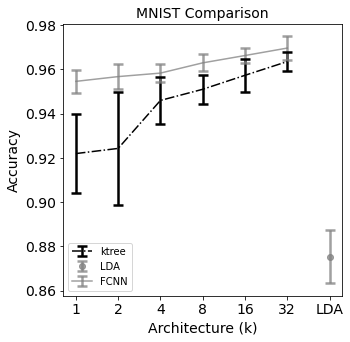


Original Input

kTree Values
1 : 0.7900 +/- 0.0202, n = 10
2 : 0.8122 +/- 0.0099, n = 9
4 : 0.7937 +/- 0.0443, n = 10
8 : 0.8184 +/- 0.0058, n = 10
16 : 0.8254 +/- 0.0073, n = 10
32 : 0.8300 +/- 0.0063, n = 10

FCNN Values
1 : 0.8262 +/- 0.0063, n = 10
2 : 0.8286 +/- 0.0041, n = 10
4 : 0.8280 +/- 0.0065, n = 10
8 : 0.8299 +/- 0.0085, n = 10
16 : 0.8307 +/- 0.0049, n = 10
32 : 0.8290 +/- 0.0075, n = 10

Bounds
lda: 0.6750 +/- 0.0108, n= 10

Comparisons
1 v fcnn: 0.0001 
2 v fcnn: 0.0003 
4 v fcnn: 0.0342 
8 v fcnn: 0.0035 
16 v fcnn: 0.0891 
32 v fcnn: 0.7516 

1 v lda  -  p = 0.0000


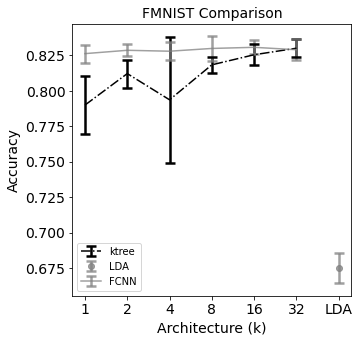


Original Input

kTree Values
1 : 0.8035 +/- 0.0488, n = 10
2 : 0.8246 +/- 0.0376, n = 9
4 : 0.8549 +/- 0.0111, n = 10
8 : 0.8686 +/- 0.0118, n = 10
16 : 0.8704 +/- 0.0098, n = 10
32 : 0.8791 +/- 0.0113, n = 10

FCNN Values
1 : 0.8674 +/- 0.0188, n = 10
2 : 0.8774 +/- 0.0131, n = 10
4 : 0.8820 +/- 0.0157, n = 10
8 : 0.8898 +/- 0.0150, n = 10
16 : 0.9009 +/- 0.0104, n = 10
32 : 0.9088 +/- 0.0080, n = 10

Bounds
lda: 0.6790 +/- 0.0164, n= 10

Comparisons
1 v fcnn: 0.0018 
2 v fcnn: 0.0010 
4 v fcnn: 0.0005 
8 v fcnn: 0.0038 
16 v fcnn: 0.0000 
32 v fcnn: 0.0000 

1 v lda  -  p = 0.0000


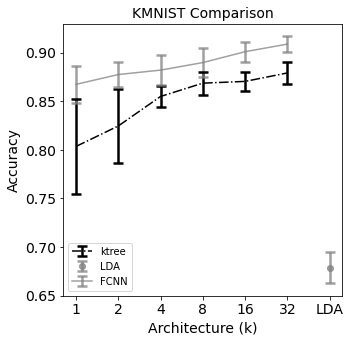


Original Input

kTree Values
1 : 0.8524 +/- 0.1520, n = 10
2 : 0.9722 +/- 0.0069, n = 10
4 : 0.9398 +/- 0.1066, n = 10
8 : 0.9816 +/- 0.0026, n = 10
16 : 0.9832 +/- 0.0048, n = 10
32 : 0.9851 +/- 0.0029, n = 10

FCNN Values
1 : 0.9779 +/- 0.0046, n = 10
2 : 0.9816 +/- 0.0036, n = 10
4 : 0.9824 +/- 0.0030, n = 10
8 : 0.9826 +/- 0.0037, n = 10
16 : 0.9835 +/- 0.0039, n = 10
32 : 0.9846 +/- 0.0034, n = 10

Bounds
lda: 0.5821 +/- 0.0180, n= 10

Comparisons
1 v fcnn: 0.0235 
2 v fcnn: 0.0018 
4 v fcnn: 0.2466 
8 v fcnn: 0.5330 
16 v fcnn: 0.8897 
32 v fcnn: 0.7357 

1 v lda  -  p = 0.0000


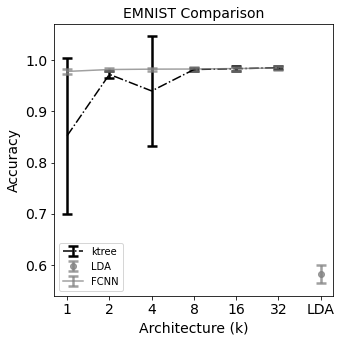


Original Input

kTree Values
1 : 0.5811 +/- 0.0412, n = 8
2 : 0.6031 +/- 0.0527, n = 7
4 : 0.5797 +/- 0.0428, n = 10
8 : 0.5940 +/- 0.0530, n = 10
16 : 0.6243 +/- 0.0508, n = 10
32 : 0.6036 +/- 0.0661, n = 9

FCNN Values
1 : 0.6117 +/- 0.0844, n = 8
2 : 0.6318 +/- 0.1011, n = 10
4 : 0.6325 +/- 0.1112, n = 6
8 : 0.6346 +/- 0.1184, n = 10
16 : 0.6905 +/- 0.1001, n = 10
32 : 0.7794 +/- 0.0301, n = 9

Bounds
lda: 0.5186 +/- 0.0102, n= 10

Comparisons
1 v fcnn: 0.4024 
2 v fcnn: 0.5272 
4 v fcnn: 0.2287 
8 v fcnn: 0.3602 
16 v fcnn: 0.0935 
32 v fcnn: 0.0000 

1 v lda  -  p = 0.0005


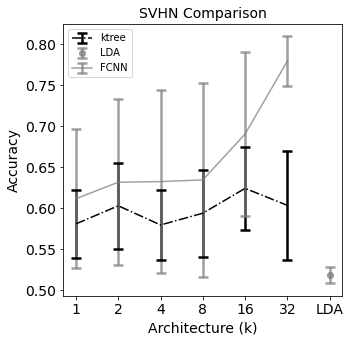


Original Input

kTree Values
1 : 0.8221 +/- 0.0465, n = 7
2 : 0.8731 +/- 0.0129, n = 8
4 : 0.8256 +/- 0.1052, n = 7
8 : 0.8783 +/- 0.0179, n = 6
16 : 0.8873 +/- 0.0151, n = 8
32 : 0.8981 +/- 0.0080, n = 9

FCNN Values
1 : 0.8971 +/- 0.0199, n = 9
2 : 0.9021 +/- 0.0179, n = 10
4 : 0.9031 +/- 0.0177, n = 10
8 : 0.9055 +/- 0.0157, n = 10
16 : 0.9037 +/- 0.0148, n = 10
32 : 0.9067 +/- 0.0169, n = 10

Bounds
lda: 0.8362 +/- 0.0306, n= 10

Comparisons
1 v fcnn: 0.0012 
2 v fcnn: 0.0022 
4 v fcnn: 0.0488 
8 v fcnn: 0.0102 
16 v fcnn: 0.0440 
32 v fcnn: 0.2031 

1 v lda  -  p = 0.4897


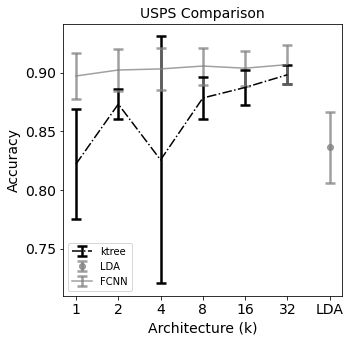


Original Input

kTree Values
1 : 0.5605 +/- 0.0140, n = 6
2 : 0.5618 +/- 0.0164, n = 4
4 : 0.5658 +/- 0.0135, n = 8
8 : 0.5736 +/- 0.0086, n = 6
16 : 0.5791 +/- 0.0108, n = 7
32 : 0.5784 +/- 0.0111, n = 7

FCNN Values
1 : 0.5592 +/- 0.0148, n = 9
2 : 0.5656 +/- 0.0080, n = 8
4 : 0.5805 +/- 0.0066, n = 10
8 : 0.5742 +/- 0.0124, n = 10
16 : 0.5721 +/- 0.0068, n = 10
32 : 0.5654 +/- 0.0104, n = 10

Bounds
lda: 0.5254 +/- 0.0069, n= 10

Comparisons
1 v fcnn: 0.8736 
2 v fcnn: 0.6257 
4 v fcnn: 0.0116 
8 v fcnn: 0.9277 
16 v fcnn: 0.1468 
32 v fcnn: 0.0344 

1 v lda  -  p = 0.0000


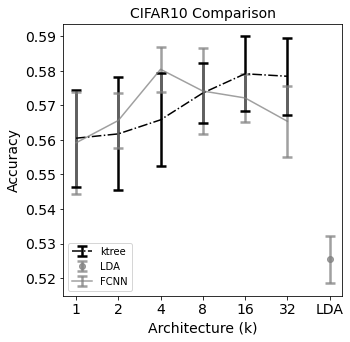

In [16]:
#######
## Plot k-tree compared to LDA and FCNN
######

cutoff = 0.535

for ds, ds_name in enumerate(ds_set):

    fig, ax = plt.subplots(figsize=(5,5))

    x = np.arange(len(trees_set))
        
    # Orig
    acc_mean, acc_std, counts = mean_std(acc, ds, cutoff)

    ax.errorbar(x, acc_mean, yerr=acc_std, capsize=5, capthick=2.5, elinewidth=2.5, ls='-.',c='black')

    # LDA
    idxl = np.where(acc_lin[ds,:] > 0.50)[0]
    acc_lin_mean = np.mean(acc_lin[ds,idxl])
    acc_lin_std = np.std(acc_lin[ds,idxl])
    
    ax.errorbar(6, acc_lin_mean, yerr=acc_lin_std, capsize=5, fmt='o', capthick=2.5, elinewidth=2.5, c='gray', alpha=0.75)

    # FCNN

    acc_fc_mean, acc_fc_std, fc_counts = mean_std(acc_fc_new, ds, cutoff)
    ax.errorbar(x, acc_fc_mean, yerr=acc_fc_std, capsize=5, capthick=2.5, elinewidth=2.5, ls='-', c='gray', alpha=0.75)

    ax.set_xticks(np.arange(len(trees_set)+1))
    ax.set_xticklabels(np.concatenate((trees_set,['LDA']),0), fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_xlabel('Architecture (k)', fontsize=14)
    plt.yticks(fontsize=14)

    ax.set_title(ds_name+' Comparison', fontsize=14)
    ax.legend(['ktree','LDA', 'FCNN', ])


    print('\nOriginal Input')
    print('\nkTree Values')
    for j, n_tree in enumerate(trees_set):
        print('%s : %.4f +/- %.4f, n = %d' % (n_tree, acc_mean[j], acc_std[j], counts[j]))
        
    print('\nFCNN Values')
    for j, n_tree in enumerate(trees_set):
        print('%s : %.4f +/- %.4f, n = %d' % (n_tree, acc_fc_mean[j], acc_fc_std[j], fc_counts[j]))
        
    print('\nBounds')
    print('lda: %.4f +/- %.4f, n= %d' % (acc_lin_mean, acc_lin_std, len(idxl)))
    
    print('\nComparisons')
    comparisons = comparison(acc, acc_fc_new, ds, cutoff)
    for j, n_tree in enumerate(trees_set):
        print('%s v fcnn: %.4f ' % (n_tree, comparisons[j]))
    
    print()
    idx = np.where(acc[ds,:,0] > cutoff)[0]
    _, compare_1vlda = scipy.stats.ttest_ind(acc[ds,idx,0], acc_lin[ds,idxl])
    print('1 v lda  -  p = %.4f' % compare_1vlda)
        

    
#     plt.savefig(ds_name+'_orig.svg', format='svg')
    
    plt.show()


# Plot k-tree with original, permuted, and randomized input; compared to LDA and FCNN

lin n =  10

Comparisons
1 - orig v rand: 0.0005 
2 - orig v rand: 0.0012 
4 - orig v rand: 0.0025 
8 - orig v rand: 0.0000 
16 - orig v rand: 0.0032 
32 - orig v rand: 0.0000 


1 - orig v perm: 0.7867 
2 - orig v perm: 0.1929 
4 - orig v perm: 0.1480 
8 - orig v perm: 0.1214 
16 - orig v perm: 0.0654 
32 - orig v perm: 0.1810 


1 - orig v FCNN: 0.0001 
2 - orig v FCNN: 0.0020 
4 - orig v FCNN: 0.0046 
8 - orig v FCNN: 0.0002 
16 - orig v FCNN: 0.0042 
32 - orig v FCNN: 0.0156 


1 - perm v FCNN: 0.0015 
2 - perm v FCNN: 0.0001 
4 - perm v FCNN: 0.0688 
8 - perm v FCNN: 0.0018 
16 - perm v FCNN: 0.1549 
32 - perm v FCNN: 0.1018 


1 - rand v FCNN: 0.0000 
2 - rand v FCNN: 0.0000 
4 - rand v FCNN: 0.0003 
8 - rand v FCNN: 0.0000 
16 - rand v FCNN: 0.0011 
32 - rand v FCNN: 0.0000 


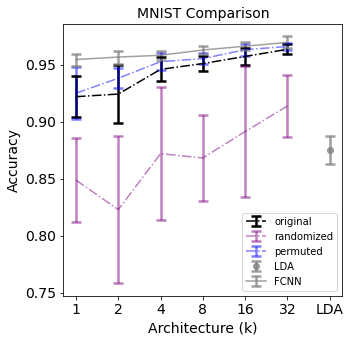

lin n =  10

Comparisons
1 - orig v rand: 0.2700 
2 - orig v rand: 0.0556 
4 - orig v rand: 0.5807 
8 - orig v rand: 0.0089 
16 - orig v rand: 0.0233 
32 - orig v rand: 0.0004 


1 - orig v perm: 0.2372 
2 - orig v perm: 0.3514 
4 - orig v perm: 0.1814 
8 - orig v perm: 0.3506 
16 - orig v perm: 0.3569 
32 - orig v perm: 0.4993 


1 - orig v FCNN: 0.0001 
2 - orig v FCNN: 0.0003 
4 - orig v FCNN: 0.0342 
8 - orig v FCNN: 0.0035 
16 - orig v FCNN: 0.0891 
32 - orig v FCNN: 0.7516 


1 - perm v FCNN: 0.0000 
2 - perm v FCNN: 0.0000 
4 - perm v FCNN: 0.0001 
8 - perm v FCNN: 0.0903 
16 - perm v FCNN: 0.0041 
32 - perm v FCNN: 0.7513 


1 - rand v FCNN: 0.0003 
2 - rand v FCNN: 0.0000 
4 - rand v FCNN: 0.0000 
8 - rand v FCNN: 0.0001 
16 - rand v FCNN: 0.0012 
32 - rand v FCNN: 0.0026 


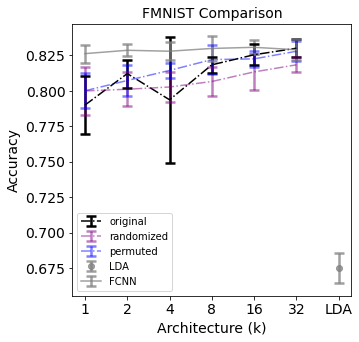

lin n =  10

Comparisons
1 - orig v rand: 0.1065 
2 - orig v rand: 0.0735 
4 - orig v rand: 0.0030 
8 - orig v rand: 0.0001 
16 - orig v rand: 0.0029 
32 - orig v rand: 0.0035 


1 - orig v perm: 0.1799 
2 - orig v perm: 0.9804 
4 - orig v perm: 0.9723 
8 - orig v perm: 0.8171 
16 - orig v perm: 0.6534 
32 - orig v perm: 0.4605 


1 - orig v FCNN: 0.0018 
2 - orig v FCNN: 0.0010 
4 - orig v FCNN: 0.0005 
8 - orig v FCNN: 0.0038 
16 - orig v FCNN: 0.0000 
32 - orig v FCNN: 0.0000 


1 - perm v FCNN: 0.0023 
2 - perm v FCNN: 0.0006 
4 - perm v FCNN: 0.0008 
8 - perm v FCNN: 0.0009 
16 - perm v FCNN: 0.0001 
32 - perm v FCNN: 0.0000 


1 - rand v FCNN: 0.0000 
2 - rand v FCNN: 0.0003 
4 - rand v FCNN: 0.0000 
8 - rand v FCNN: 0.0000 
16 - rand v FCNN: 0.0000 
32 - rand v FCNN: 0.0000 


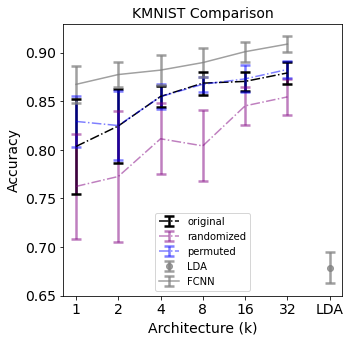

lin n =  10

Comparisons
1 - orig v rand: 0.3213 
2 - orig v rand: 0.0020 
4 - orig v rand: 0.1580 
8 - orig v rand: 0.0002 
16 - orig v rand: 0.0002 
32 - orig v rand: 0.0001 


1 - orig v perm: 0.6393 
2 - orig v perm: 0.2850 
4 - orig v perm: 0.3227 
8 - orig v perm: 0.0372 
16 - orig v perm: 0.2872 
32 - orig v perm: 0.8072 


1 - orig v FCNN: 0.0235 
2 - orig v FCNN: 0.0018 
4 - orig v FCNN: 0.2466 
8 - orig v FCNN: 0.5330 
16 - orig v FCNN: 0.8897 
32 - orig v FCNN: 0.7357 


1 - perm v FCNN: 0.0491 
2 - perm v FCNN: 0.1859 
4 - perm v FCNN: 0.0011 
8 - perm v FCNN: 0.0222 
16 - perm v FCNN: 0.1965 
32 - perm v FCNN: 0.9693 


1 - rand v FCNN: 0.0005 
2 - rand v FCNN: 0.0013 
4 - rand v FCNN: 0.0075 
8 - rand v FCNN: 0.0002 
16 - rand v FCNN: 0.0001 
32 - rand v FCNN: 0.0002 


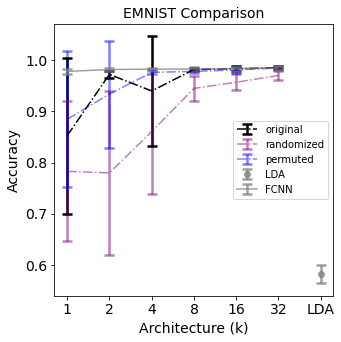

lin n =  10

Comparisons
1 - orig v rand: 0.3771 
2 - orig v rand: 0.6572 
4 - orig v rand: 0.1288 
8 - orig v rand: 0.2867 
16 - orig v rand: 0.0685 
32 - orig v rand: 0.3192 


1 - orig v perm: 0.1736 
2 - orig v perm: 0.5863 
4 - orig v perm: 0.0559 
8 - orig v perm: 0.1232 
16 - orig v perm: 0.6392 
32 - orig v perm: 0.1503 


1 - orig v FCNN: 0.4024 
2 - orig v FCNN: 0.5272 
4 - orig v FCNN: 0.2287 
8 - orig v FCNN: 0.3602 
16 - orig v FCNN: 0.0935 
32 - orig v FCNN: 0.0000 


1 - perm v FCNN: 0.8937 
2 - perm v FCNN: 0.8176 
4 - perm v FCNN: 0.9969 
8 - perm v FCNN: 0.8514 
16 - perm v FCNN: 0.2854 
32 - perm v FCNN: 0.0012 


1 - rand v FCNN: 0.1601 
2 - rand v FCNN: 0.2895 
4 - rand v FCNN: 0.0635 
8 - rand v FCNN: 0.1385 
16 - rand v FCNN: 0.0076 
32 - rand v FCNN: 0.0000 


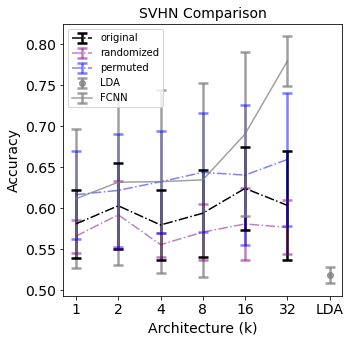

lin n =  10

Comparisons
1 - orig v rand: 0.0195 
2 - orig v rand: 0.0035 
4 - orig v rand: 0.5283 
8 - orig v rand: 0.0007 
16 - orig v rand: 0.0093 
32 - orig v rand: 0.0012 


1 - orig v perm: 0.4505 
2 - orig v perm: 0.0894 
4 - orig v perm: 0.9409 
8 - orig v perm: 0.5029 
16 - orig v perm: 0.9153 
32 - orig v perm: 0.2902 


1 - orig v FCNN: 0.0012 
2 - orig v FCNN: 0.0022 
4 - orig v FCNN: 0.0488 
8 - orig v FCNN: 0.0102 
16 - orig v FCNN: 0.0440 
32 - orig v FCNN: 0.2031 


1 - perm v FCNN: 0.0068 
2 - perm v FCNN: 0.0052 
4 - perm v FCNN: 0.0851 
8 - perm v FCNN: 0.1054 
16 - perm v FCNN: 0.1793 
32 - perm v FCNN: 0.1766 


1 - rand v FCNN: 0.0000 
2 - rand v FCNN: 0.0001 
4 - rand v FCNN: 0.0015 
8 - rand v FCNN: 0.0000 
16 - rand v FCNN: 0.0012 
32 - rand v FCNN: 0.0005 


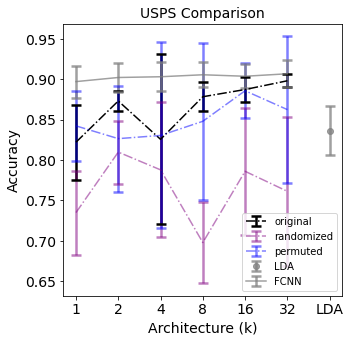

lin n =  10

Comparisons
1 - orig v rand: 0.9205 
2 - orig v rand: 0.3328 
4 - orig v rand: 0.8519 
8 - orig v rand: 0.5169 
16 - orig v rand: 0.0427 
32 - orig v rand: 0.1652 


1 - orig v perm: 0.0583 
2 - orig v perm: 0.2318 
4 - orig v perm: 0.4424 
8 - orig v perm: 0.6958 
16 - orig v perm: 0.6482 
32 - orig v perm: 0.8751 


1 - orig v FCNN: 0.8736 
2 - orig v FCNN: 0.6257 
4 - orig v FCNN: 0.0116 
8 - orig v FCNN: 0.9277 
16 - orig v FCNN: 0.1468 
32 - orig v FCNN: 0.0344 


1 - perm v FCNN: 0.0244 
2 - perm v FCNN: 0.1873 
4 - perm v FCNN: 0.1012 
8 - perm v FCNN: 0.7538 
16 - perm v FCNN: 0.6406 
32 - perm v FCNN: 0.0276 


1 - rand v FCNN: 0.9578 
2 - rand v FCNN: 0.3048 
4 - rand v FCNN: 0.0286 
8 - rand v FCNN: 0.4297 
16 - rand v FCNN: 0.1340 
32 - rand v FCNN: 0.4919 


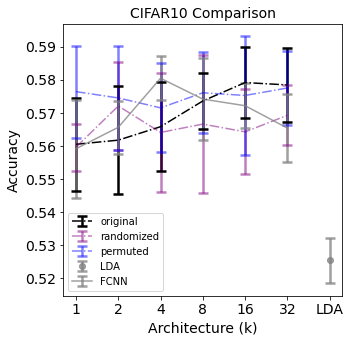

In [17]:
#######
## Plot k-tree with original, permuted, and randomized input; compared to LDA and FCNN
######

cutoff=0.535

for ds, ds_name in enumerate(ds_set):

    fig, ax = plt.subplots(figsize=(5,5))

    x = np.arange(len(trees_set))

    # Orig
    acc_mean, acc_std, counts = mean_std(acc, ds, cutoff)

    ax.errorbar(x, acc_mean, yerr=acc_std, capsize=5, capthick=2.5, elinewidth=2.5, ls='-.',c='black')
    
    # Rand
    rand_acc_mean, rand_acc_std, rand_counts = mean_std(rand_acc, ds, cutoff)
    
    ax.errorbar(x, rand_acc_mean, yerr=rand_acc_std, capsize=5, capthick=2.5, elinewidth=2.5, ls='-.', c='purple', alpha=0.5)
    
    # Perm
    perm_acc_mean, perm_acc_std, perm_counts = mean_std(perm_acc, ds, cutoff)

    ax.errorbar(x, perm_acc_mean, yerr=perm_acc_std, capsize=5, capthick=2.5, elinewidth=2.5, ls='-.', c='blue', alpha=0.5)


    idxl = np.where(acc_lin[ds,:] > 0.50)[0]
    print('lin n = ', len(idxl))
    acc_lin_mean = np.mean(acc_lin[ds,idxl])
    acc_lin_std = np.std(acc_lin[ds,idxl])
    ax.errorbar(6, acc_lin_mean, yerr=acc_lin_std, capsize=5, fmt='o', capthick=2.5, elinewidth=2.5, c='gray', alpha=0.75)

    acc_fc_mean, acc_fc_std, fc_counts = mean_std(acc_fc_new, ds, cutoff)
    ax.errorbar(x, acc_fc_mean, yerr=acc_fc_std, capsize=5, capthick=2.5, elinewidth=2.5, ls='-', c='gray', alpha=0.75)

    ax.set_xticks(np.arange(len(trees_set)+1))
    ax.set_xticklabels(np.concatenate((trees_set,['LDA']),0), fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_xlabel('Architecture (k)', fontsize=14)
    plt.yticks(fontsize=14)

    ax.set_title(ds_name+' Comparison', fontsize=14)
    ax.legend(['original','randomized','permuted','LDA','FCNN'])


    print('\nComparisons')
    comparisons = comparison(acc, rand_acc, ds, cutoff)
    for j, n_tree in enumerate(trees_set):
        print('%s - orig v rand: %.4f ' % (n_tree, comparisons[j]))
    
    print('\n')
    comparisons = comparison(acc, perm_acc, ds, cutoff)
    for j, n_tree in enumerate(trees_set):
        print('%s - orig v perm: %.4f ' % (n_tree, comparisons[j]))
    
    print('\n')
    comparisons = comparison(acc, acc_fc_new, ds, cutoff)
    for j, n_tree in enumerate(trees_set):
        print('%s - orig v FCNN: %.4f ' % (n_tree, comparisons[j]))
        
    print('\n')
    comparisons = comparison(perm_acc, acc_fc_new, ds, cutoff)
    for j, n_tree in enumerate(trees_set):
        print('%s - perm v FCNN: %.4f ' % (n_tree, comparisons[j]))
        
    print('\n')
    comparisons = comparison(rand_acc, acc_fc_new, ds, cutoff)
    for j, n_tree in enumerate(trees_set):
        print('%s - rand v FCNN: %.4f ' % (n_tree, comparisons[j]))
    
#     plt.savefig(ds_name+'_rand_perm.svg', format='svg')
    
    plt.show()
